## Demo and testing notebook

This notebook runs through a lot of the features of lazychart and is also useful for me to check things during development.

### Until this is a proper package, add src to path

In [5]:
# ensure notebook can import from local sticky directory
import sys
sys.path.append("D:/Projects/lazychart/src")

### Object oriented vs Functional appraoch

There are two ways to use this package:

1. Object oriented approach. You instantiate one or more instances of the StickyPlotter class and use them to control your plotting.

```python
# object oriented approach
from lazychart import ChartMonkey
cm = ChartMonkey()
cm.bar(data=df, x='x_col')
```

2. Functional approach. You call the package functions which are defined in the \_\_init__.py file which instantiates the StickyPlotter class and passes your requests through for it to handle.

```python
# functional approach
from lazychart import bar
bar(data=df, x='x_col')
```

In [6]:
from lazychart import ChartMonkey
cm = ChartMonkey()

### Generate some data

In [15]:
# object oriented approach
df = cm.example_data(n=1461)
df.head()

,date,user,sleep_hours,steps,alcohol,work_stress,nutrition,score,predicted_emotion,month,weekday
0,2021-08-18 22:01:56.589795,user39,6.651987,5688.783716,2,2.313749,5.068314,8.593897,Happy,2021-08,Wednesday
1,2021-08-19 22:01:56.589795,user29,7.198558,6942.937849,3,4.208799,8.146145,9.696701,Happy,2021-08,Thursday
2,2021-08-20 22:01:56.589795,user15,5.565635,4095.907190,0,9.476706,7.504157,3.874251,Happy,2021-08,Friday
3,2021-08-21 22:01:56.589795,user43,7.581022,4956.492933,3,3.122092,10.000000,7.801262,Happy,2021-08,Saturday
4,2021-08-22 22:01:56.589795,user8,5.475985,4373.712913,2,3.138230,7.752243,7.591253,Happy,2021-08,Sunday


In [17]:
cm.sticky(data=df) # I'm wicked and I'm lazy - most of the cells below call data=df but it's getting old so going forward I might just use this

data generation notes/ideas
* try to balance out the predicted_emotion class, currently 100% happy
* make people sleep more on the weekends

library ideas
* custom sort order as list of values e.g. ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
* make the sort asc/desc default based on the sort type (values descending, labels ascending)

### Legends

My goodness it took a long time to get these working. Features:
* 'right' and 'bottom' options work similar to Google Sheets or other "plug and play" experiences
* number of rows and columns is determined dynamically to avoid legends being taller/wider than the figure
* figure size is dynamically increased, so adding many categories just results in a big figure/legend rather than a squished data chart
* long legend labels wrap automatically if on the 'right', to avoid taking up more than 30% of the figure width

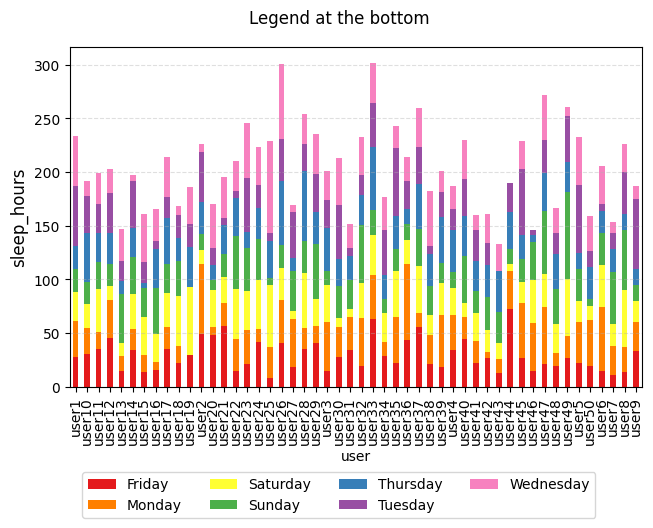

In [8]:
# legend on bottom
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', title='Legend at the bottom', stacking='standard', legend='bottom')

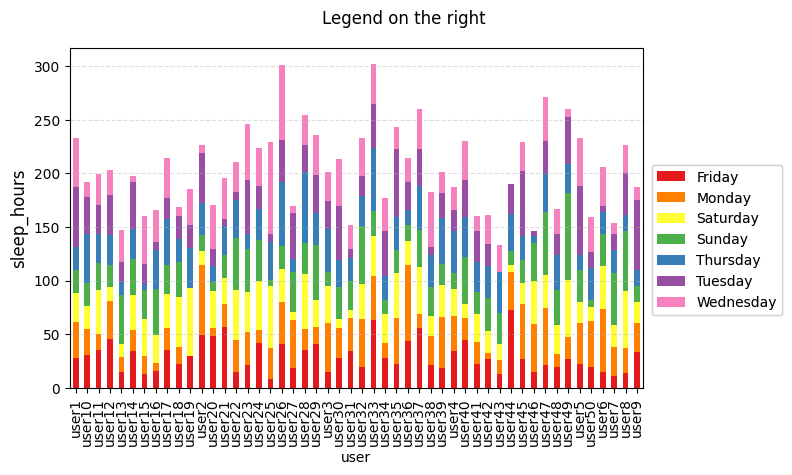

In [5]:
# legend on the right
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', title='Legend on the right', stacking='standard', legend='right')

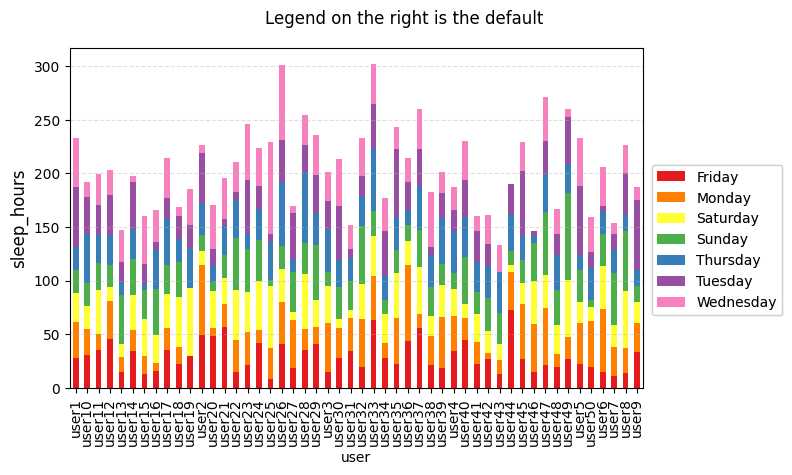

In [6]:
# this is also the default
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', title='Legend on the right is the default', stacking='standard')

In [6]:
### Long legend labels

weekday_mapping = {
    "Monday":    "Monday is the first day",
    "Tuesday":   "Tuesday is the second day",
    "Wednesday": "Wednesday is the third day",
    "Thursday":  "Thursday is the fourth day",
    "Friday":    "Friday is the fifth day",
    "Saturday":  "Saturday is the sixth day",
    "Sunday":    "Sunday is the seventh day"
}

# Apply mapping to create longer names
df['weekday_long'] = df['weekday'].map(weekday_mapping)

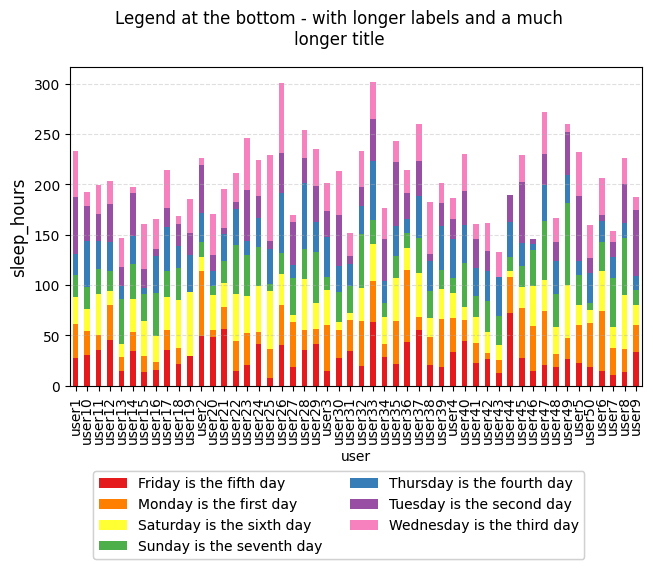

In [7]:
# legend on bottom
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday_long', title='Legend at the bottom - with longer labels and a much longer title', stacking='standard', legend='bottom')

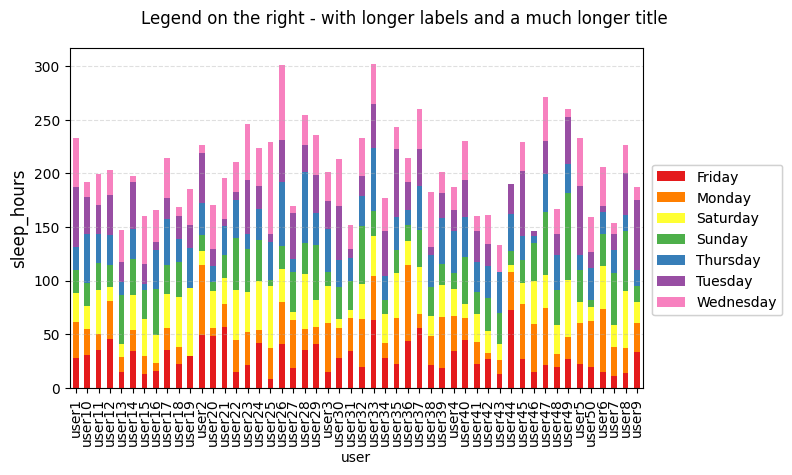

In [8]:
# legend on the right
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', title='Legend on the right - with longer labels and a much longer title', stacking='standard', legend='right')

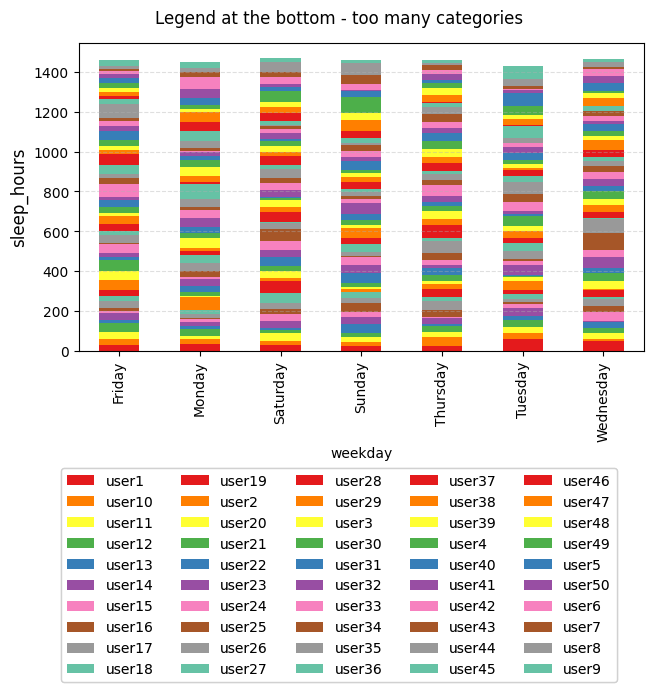

In [9]:
# legend on bottom
cm.bar(data=df, x='weekday', y='sleep_hours', group_by='user', title='Legend at the bottom - too many categories', stacking='standard', legend='bottom')

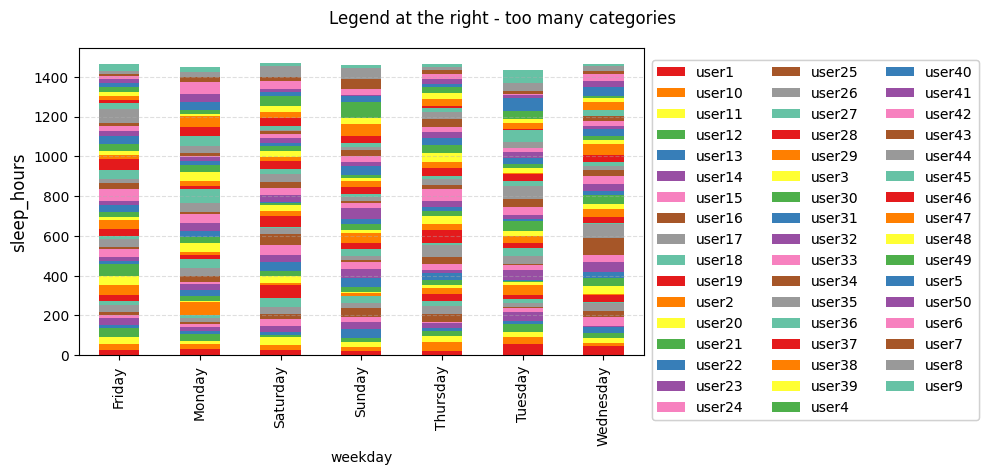

In [10]:
# legend on the right
cm.bar(data=df, x='weekday', y='sleep_hours', group_by='user', title='Legend at the right - too many categories', stacking='standard', legend='right')

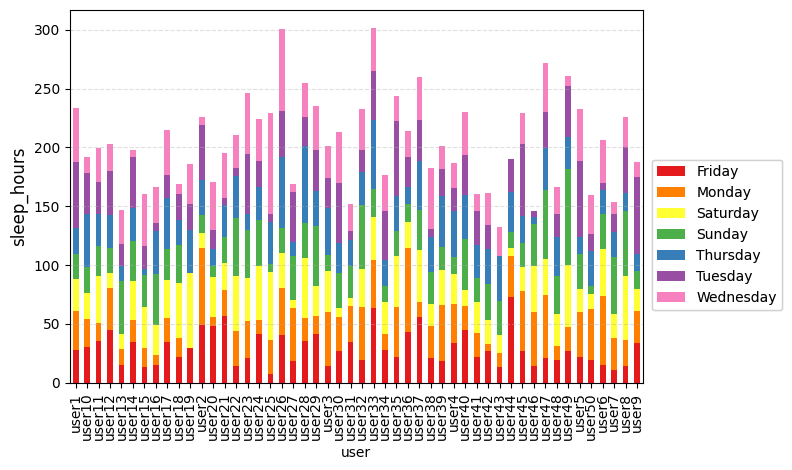

In [ ]:
# Still works without a title
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', stacking='standard', legend='right')

### Automatic aggregation on the x axis

When a time variable is used on the x axis, the `x_period` parameter can be used to automatically group up the data into common time bands.

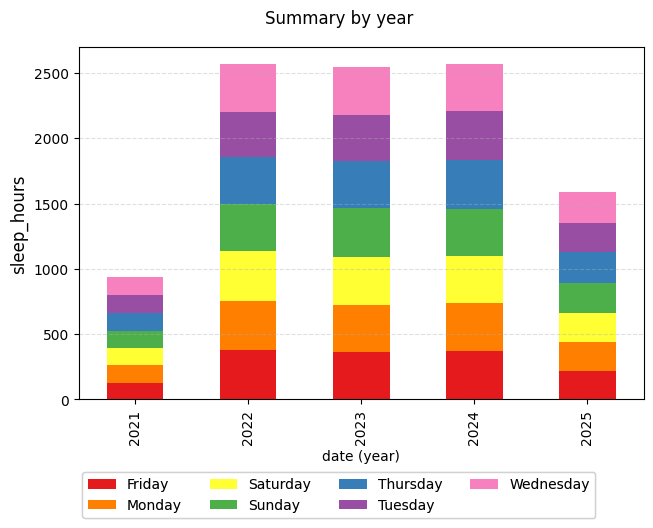

In [13]:
cm.bar(data=df, x='date', x_period='year', y='sleep_hours', group_by='weekday', title='Summary by year', stacking='standard', legend='bottom')

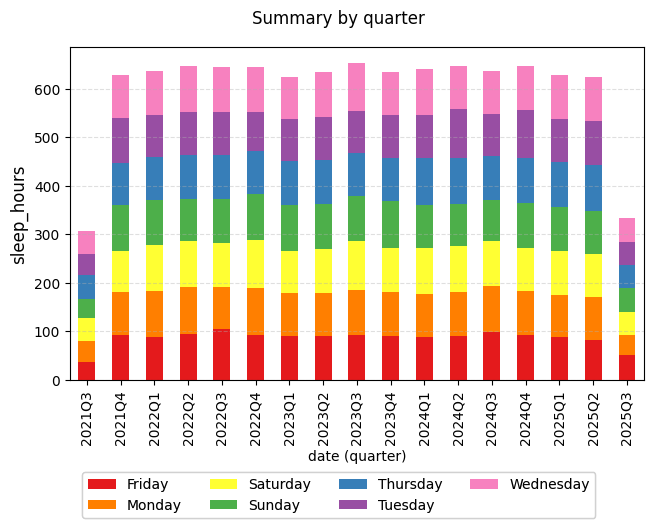

In [14]:
cm.bar(data=df, x='date', x_period='quarter', y='sleep_hours', group_by='weekday', title='Summary by quarter', stacking='standard', legend='bottom')

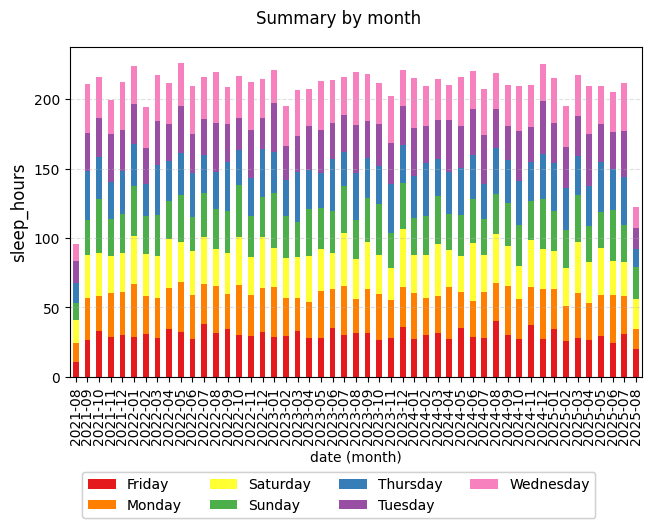

In [15]:
cm.bar(data=df, x='date', x_period='month', y='sleep_hours', group_by='weekday', title='Summary by month', stacking='standard', legend='bottom')

### Custom sort order

In addition to sorting x or group_by using 'labels' or 'values' and either ascending or descending, you can pass a custom sort order e.g. for categories that are ordinal but where you don't want to have to adjust the labels to have a numeric prefix just to get the sorting correct.

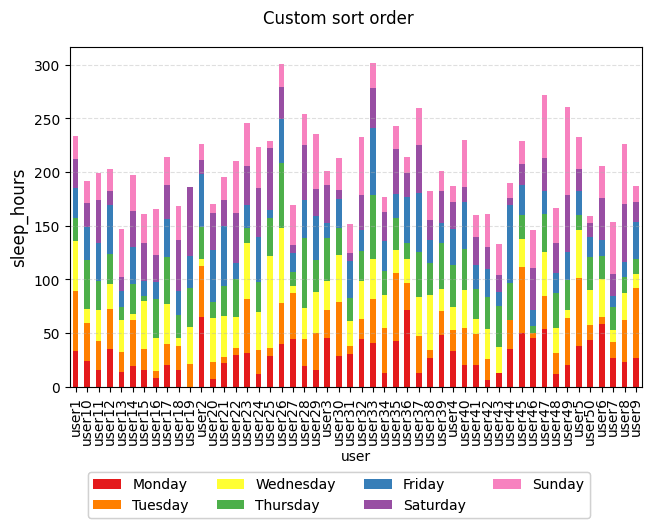

In [16]:
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', title='Custom sort order', stacking='standard', legend='bottom', sort_group_by=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

### Sticky arguments

These are turned off by default, but you can call `sticky()` to set arguments or use `sticky=True` to have all arguments within a chart call be remembered from one chart to the next

To reset this, call `clear_sticky()`.

In [7]:
# you can set the parameters in advanced
cm.sticky(data=df, x='user', y='sleep_hours', group_by='weekday', stacking='standard', sort_x_by='label', sort_x_desc=False)

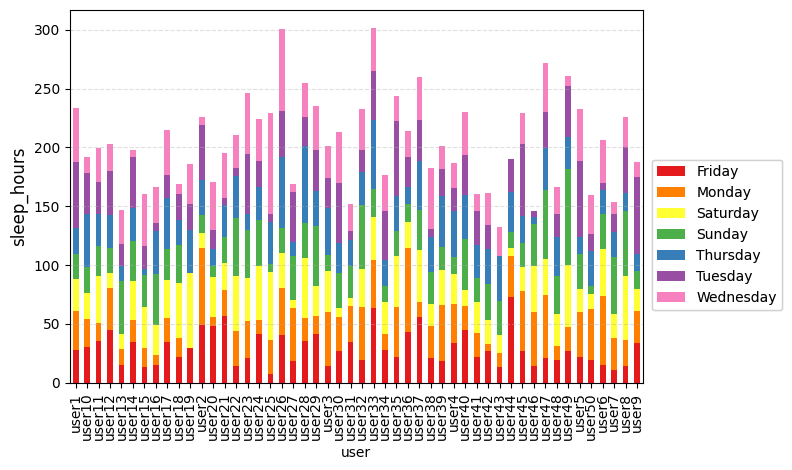

In [8]:
# all arguments passed above are being remembered
cm.bar()

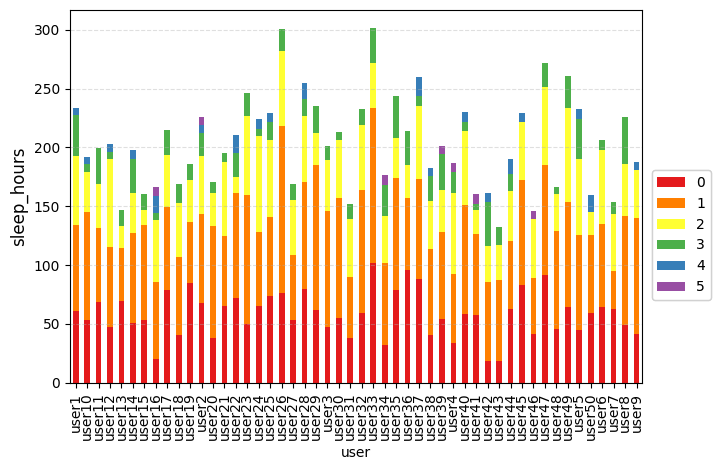

In [9]:
# no need to pass data, x, y etc. it gets remembred. can also use sticky=True to remember subsequent adjustments to the parameters.
cm.bar(group_by='alcohol', sort_group_by='label', sticky=True)

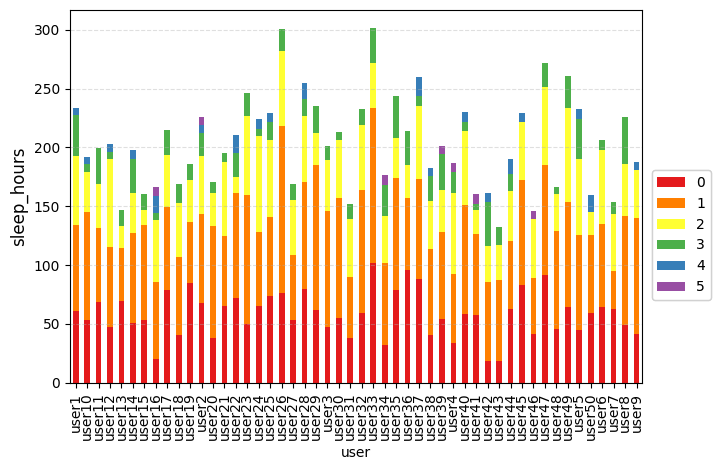

In [10]:
cm.bar(sort_group_desc=False)

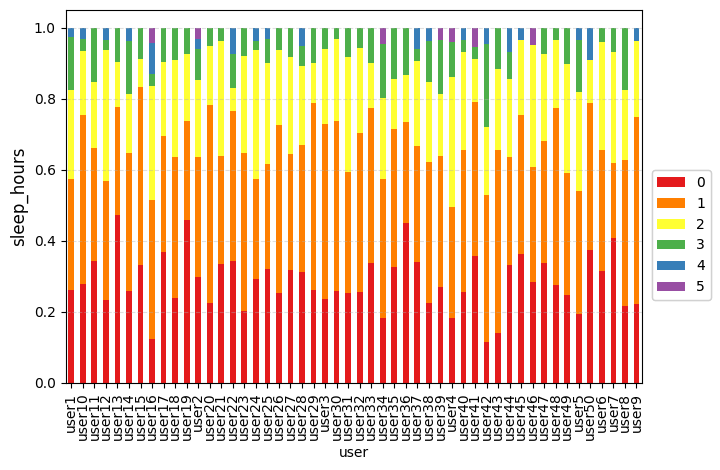

In [11]:
cm.bar(stacking='proportion')

In [12]:
# call with no parameters to reset the sticky arguments
cm.sticky()

### Custom palettes

The palette can be set using a hex color list, or the 'rainbow' and 'colorblind' presets. 

This can be done when you instantiate the ChartMonkey object using `palette` or afterwards using e.g. `cm.apply_palette(palette='colorblind')`.

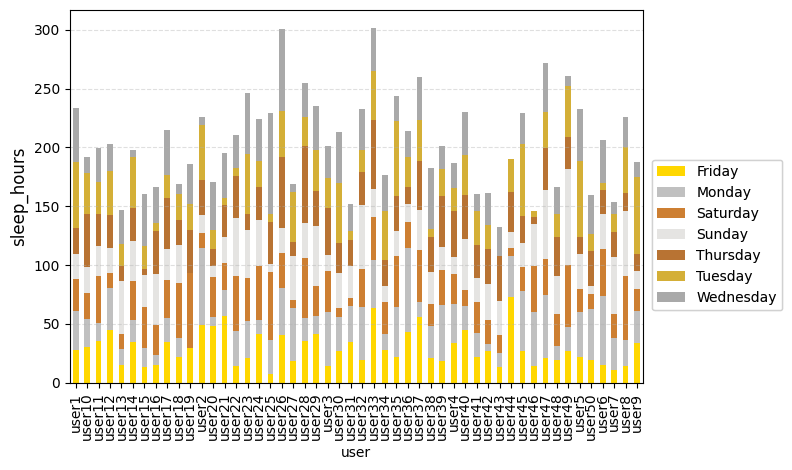

In [9]:
METALLIC_PALETTE = [
    '#FFD700',  # Gold
    '#C0C0C0',  # Silver
    '#CD7F32',  # Bronze
    '#E5E4E2',  # Platinum
    '#B87333',  # Copper
    '#D4AF37',  # Metallic Gold (Deep)
    '#A9A9A9',  # Gunmetal Gray
    '#B0C4DE',  # Steel Blue
    '#DA8A67',  # Rose Gold
    '#8C7853'   # Brass
]

# set palette when instantiating the class, using a list of hex values
custom_cm = ChartMonkey(palette=METALLIC_PALETTE)
custom_cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', stacking='standard')

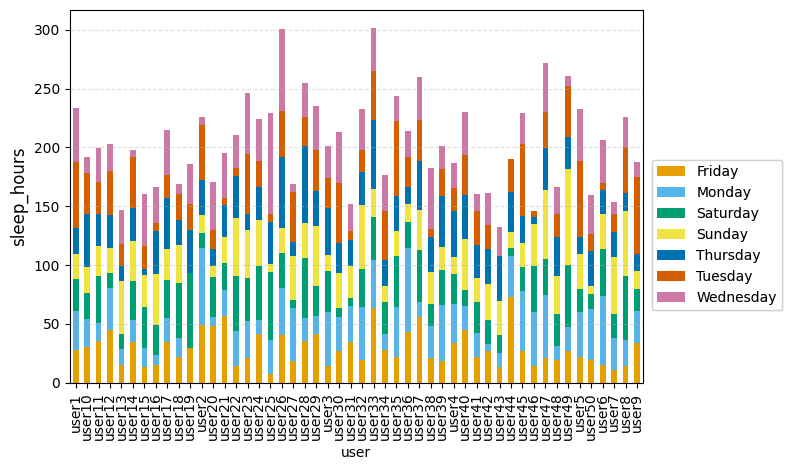

In [10]:
# set palette using the set_palette method
custom_cm.apply_palette(palette='colorblind')
custom_cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', stacking='standard')

### Frequency charts

If you don't pass a value to sum based on, you will get a count by default

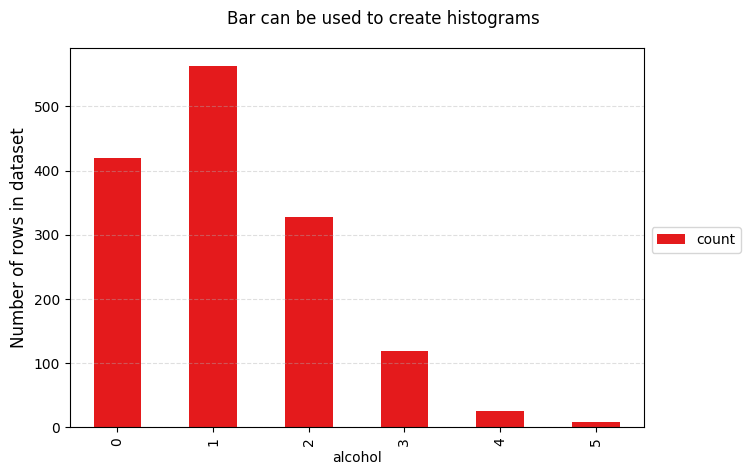

In [10]:
# TODO - consider 90 degree axis rotation only if axis labels need it?
# TODO - consider removing legend if there's only one entry?
cm.bar(data=df, x='alcohol', title='Bar can be used to create histograms')

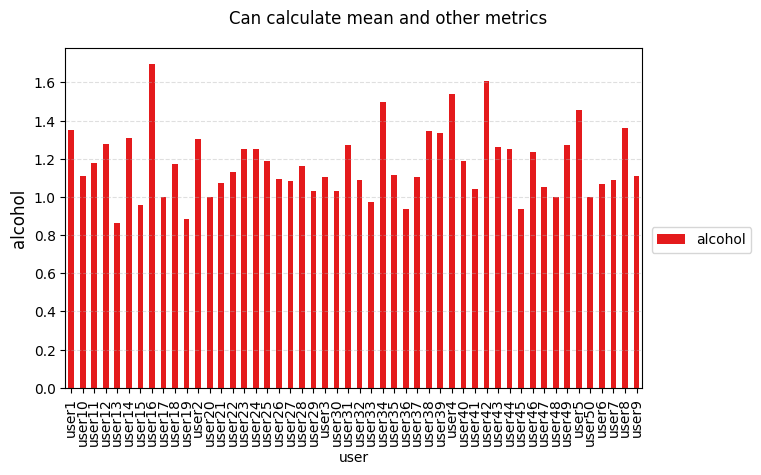

In [13]:
# TODO - figure out why sort_x='value' here doesn't seem to be working
# TODO - when applying aggfunc add this to the legend entry i.e. this one should be mean(alcohol), similar on the y axis
cm.bar(data=df, x='user', y='alcohol', title='Can calculate mean and other metrics', aggfunc='mean', sort_x='value')

### Pie charts

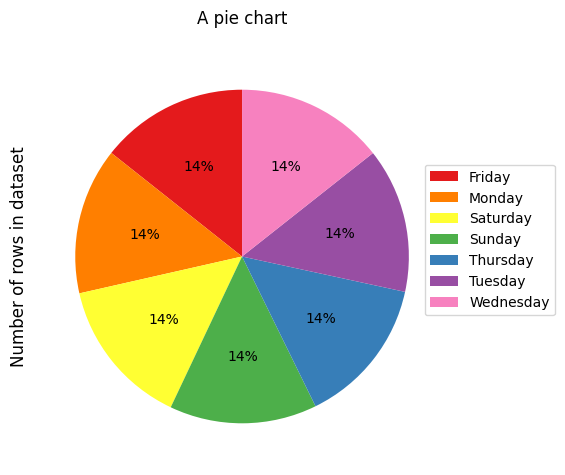

In [4]:
cm.pie(data=df, values='sleep_hours', names='weekday', title='A pie chart')

### Line charts

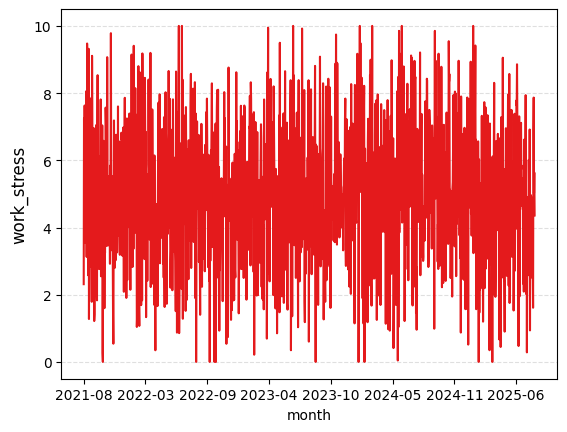

In [ ]:
# TODO: figure out why we have no legend here
cm.line(x='month', y='work_stress')

# Early stuff - need to revisit

### Post processing

The default behaviour is to show the plot and return None to suppress other cell outputs. Pass show_plot=False to instead return fig, ax for post processing.

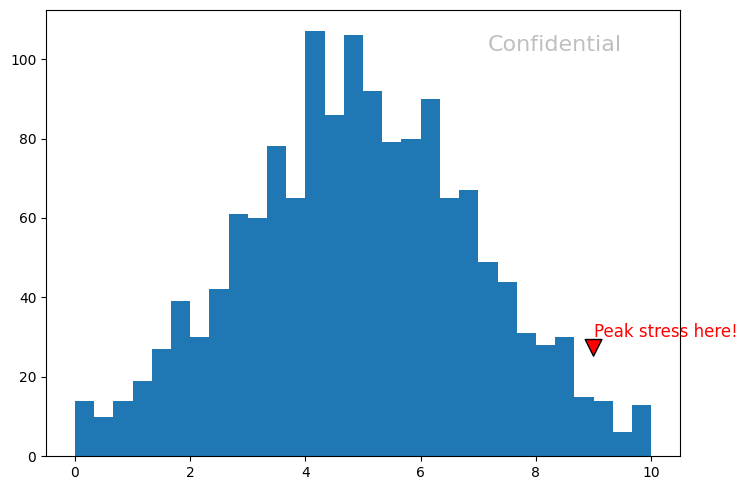

In [9]:
fig, ax = sticky.hist(data=df, x='work_stress', show_plot=False)

# Example: Add a custom annotation to the plot
ax.annotate(
    'Peak stress here!',
    xy=(9, 25), # point to annotate (arrow tip), in data coordinates
    xytext=(9, 30), # location of the annotation text, in data coordinates
    arrowprops=dict(facecolor='red', shrink=0.05), # arrow style
    fontsize=12, color='red' # text style
)

# Example: Add a watermark
fig.text(0.8, 0.9, 'Confidential', ha='center', va='center', fontsize=16, color='gray', alpha=0.5)

# Example: Save the figure with a custom DPI and tight bounding box
fig.savefig('demo_save.png', dpi=300, bbox_inches='tight')